DIABETES DATA PREDICTION SET


In [3]:
import pandas as pd
import numpy as np

try:
    df = pd.read_csv(r"C:\Users\HP\Documents\data projects\archive (12)\diabetes_prediction_dataset.csv")
    print('dataset loaded succesffully')
except FileNotFoundError:
        print("Error: 'your_diabetes_dataset.csv' not found. Please check the file path.")

dataset loaded succesffully


In [4]:
print(f"Initial DataFrame shape: {df.shape}")


Initial DataFrame shape: (100000, 9)


In [5]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [7]:
print("\n DataFrame Info (Data Types and Non-Null Counts): ")
df.info()


 DataFrame Info (Data Types and Non-Null Counts): 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [8]:
print("\n  Descriptive Statistics for Numerical Columns: ")
df.describe()


  Descriptive Statistics for Numerical Columns: 


,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [9]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000,100000.000000,100000.00000,100000.000000,100000,100000.000000,100000.000000,100000.000000,100000.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,No Info,NaN,NaN,NaN,NaN
freq,58552,NaN,NaN,NaN,35816,NaN,NaN,NaN,NaN
mean,NaN,41.885856,0.07485,0.039420,NaN,27.320767,5.527507,138.058060,0.085000
std,NaN,22.516840,0.26315,0.194593,NaN,6.636783,1.070672,40.708136,0.278883
min,NaN,0.080000,0.00000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.00000,0.000000,NaN,23.630000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.00000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,60.000000,0.00000,0.000000,NaN,29.580000,6.200000,159.000000,0.000000


In [10]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [11]:
df.isnull().sum() / len(df)* 100

gender                 0.0
age                    0.0
hypertension           0.0
heart_disease          0.0
smoking_history        0.0
bmi                    0.0
HbA1c_level            0.0
blood_glucose_level    0.0
diabetes               0.0
dtype: float64

In [12]:
df.duplicated().sum()

np.int64(3854)

In [13]:
duplicated_df = df.duplicated()

In [14]:
duplicate_rows = df[df.duplicated(keep=False)]
duplicate_rows


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
10,Female,53.0,0,0,never,27.32,6.1,85,0
14,Female,76.0,0,0,No Info,27.32,5.0,160,0
18,Female,42.0,0,0,No Info,27.32,5.7,80,0
41,Male,5.0,0,0,No Info,27.32,6.6,130,0
...,...,...,...,...,...,...,...,...,...
99980,Female,52.0,0,0,never,27.32,6.1,145,0
99985,Male,25.0,0,0,No Info,27.32,5.8,145,0
99989,Female,26.0,0,0,No Info,27.32,5.0,158,0
99990,Male,39.0,0,0,No Info,27.32,6.1,100,0


In [15]:
df['age'] = df['age'].replace(0.08, np.nan)
print(f"\nAge 0.08 replaced with: {df['age'].isnull().sum()}")


Age 0.08 replaced with: 36


In [16]:
median_age = df['age'].median()
df['age'].fillna(median_age, inplace=True)
print(f"Age NaNs filled with median ({median_age}). Age NaN count: {df['age'].isnull().sum()}")

Age NaNs filled with median (43.0). Age NaN count: 0


C:\Users\HP\AppData\Local\Temp\ipykernel_4160\2682425226.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['age'].fillna(median_age, inplace=True)


In [17]:
df['smoking_history'] = df['smoking_history'].replace({
    'ever': 'former',
    'not current': 'former'
})

In [24]:
df['smoking_history'] = df['smoking_history'].replace({'No Info': 'unknown'})


print("\n Consolidated 'smoker' categories: ")
print(df['smoking_history'].value_counts())


 Consolidated 'smoker' categories: 
smoking_history
unknown    35816
never      35095
former     19803
current     9286
Name: count, dtype: int64


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 12 

print(f"Current DataFrame shape: {df.shape}")
print(df.dtypes)

Current DataFrame shape: (100000, 9)
gender                  object
age                    float64
hypertension             int64
heart_disease            int64
smoking_history         object
bmi                    float64
HbA1c_level            float64
blood_glucose_level      int64
diabetes                 int64
dtype: object


In [20]:
age_bins = [ 0, 12, 18, 35, 50, 65, np.inf]
age_labels = ['child', 'adolescent', 'young adult', 'adult', 'senior adult', 'ederly']
df['age group'] = pd.cut(df['age'], bins = age_bins, labels = age_labels, right=False)

In [21]:
print("\n 'age_group' value counts: ")
print(df['age group'].value_counts().sort_index())


 'age_group' value counts: 
age group
child           11429
adolescent       5754
young adult     21541
adult           21358
senior adult    21350
ederly          18568
Name: count, dtype: int64


In [25]:
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, np.inf]
bmi_labels = ['Underweight', 'Normal Weight', 'Overweight', 'Obesity Class 1', 'Obesity Class 2', 'Obesity Class 3']
df['bmi_category'] = pd.cut(df['bmi'], bins=bmi_bins, labels=bmi_labels, right=False)

print("\n 'bmi_category' value counts: ")
print(df['bmi_category'].value_counts().sort_index())

hba1c_bins = [0, 5.7, 6.5, np.inf]
hba1c_labels = ['Normal HbA1c', 'Pre-diabetic HbA1c', 'Diabetic HbA1c']
df['hba1c_category'] = pd.cut(df['HbA1c_level'], bins=hba1c_bins, labels=hba1c_labels, right=False)

print("\n 'hba1c_category' value counts: ")
print(df['hba1c_category'].value_counts().sort_index())

glucose_bins = [0, 100, 126, np.inf]
glucose_labels = ['Normal Glucose', 'Pre-diabetic Glucose', 'Diabetic Glucose']
df['glucose_category'] = pd.cut(df['blood_glucose_level'], bins=glucose_bins, labels=glucose_labels, right=False)

print("\n 'glucose_category' value counts: ")
print(df['glucose_category'].value_counts().sort_index())

print("\n DataFrame head with new binned categories: ")
print(df.head())


 'bmi_category' value counts: 
bmi_category
Underweight         8494
Normal Weight      21792
Overweight         45793
Obesity Class 1    12954
Obesity Class 2     6299
Obesity Class 3     4668
Name: count, dtype: int64

 'hba1c_category' value counts: 
hba1c_category
Normal HbA1c          37857
Pre-diabetic HbA1c    41346
Diabetic HbA1c        20797
Name: count, dtype: int64

 'glucose_category' value counts: 
glucose_category
Normal Glucose          21119
Pre-diabetic Glucose     7025
Diabetic Glucose        71856
Name: count, dtype: int64

 DataFrame head with new binned categories: 
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         unknown  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1      

In [26]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.901307,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.502869,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.160000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


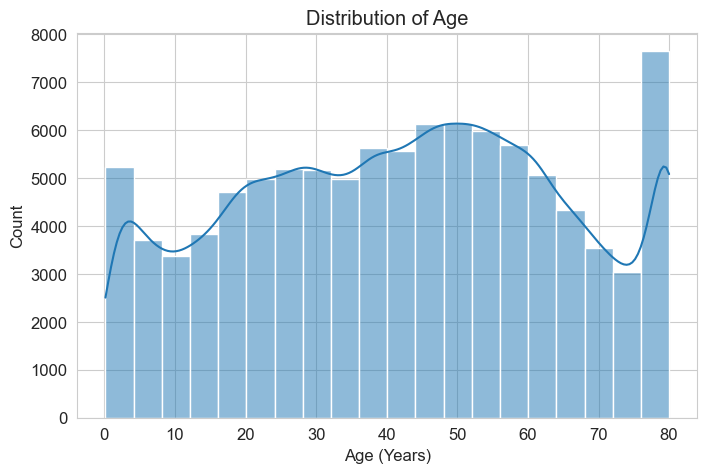

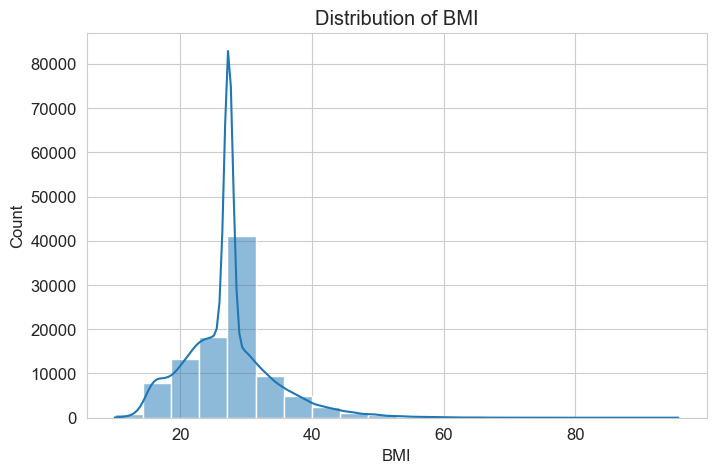

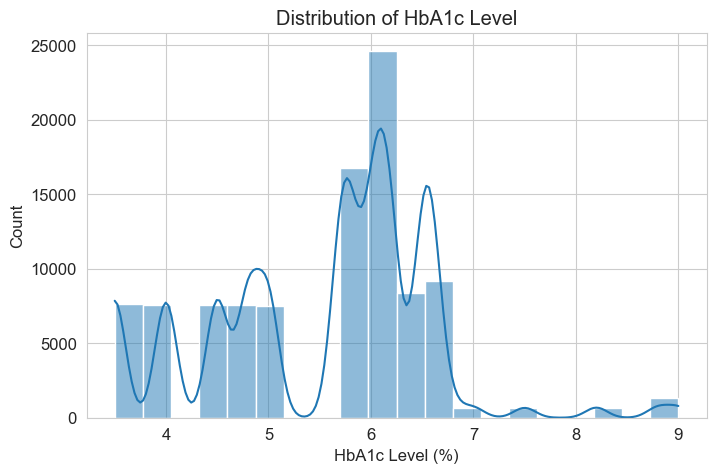

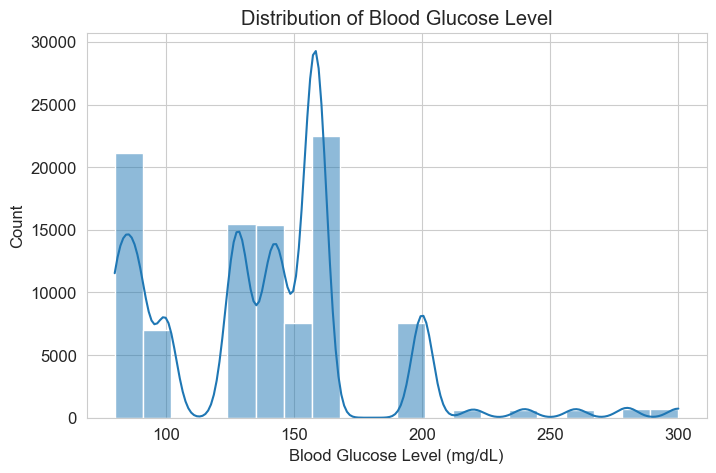

In [27]:
# Histogram for Age
plt.figure(figsize=(8, 5))
sns.histplot(df['age'], kde=True, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Age (Years)')
plt.ylabel('Count')
plt.show()

# Histogram for BMI
plt.figure(figsize=(8, 5))
sns.histplot(df['bmi'], kde=True, bins=20)
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()

# Histogram for HbA1c Level
plt.figure(figsize=(8, 5))
sns.histplot(df['HbA1c_level'], kde=True, bins=20)
plt.title('Distribution of HbA1c Level')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Count')
plt.show()

# Histogram for Blood Glucose Level
plt.figure(figsize=(8, 5))
sns.histplot(df['blood_glucose_level'], kde=True, bins=20)
plt.title('Distribution of Blood Glucose Level')
plt.xlabel('Blood Glucose Level (mg/dL)')
plt.ylabel('Count')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='gender', data=df, palette='viridis')


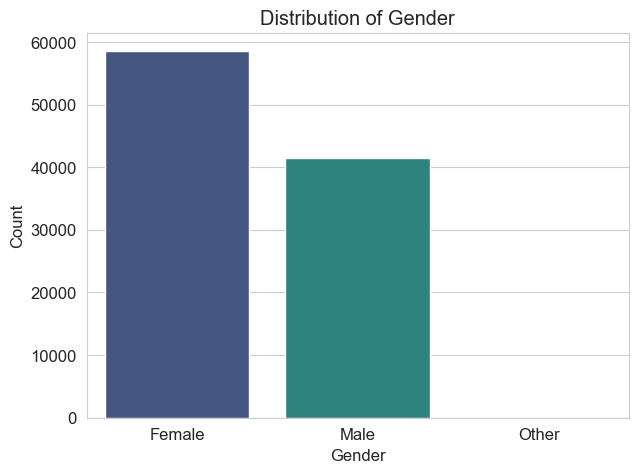

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='hypertension', data=df, palette='pastel')


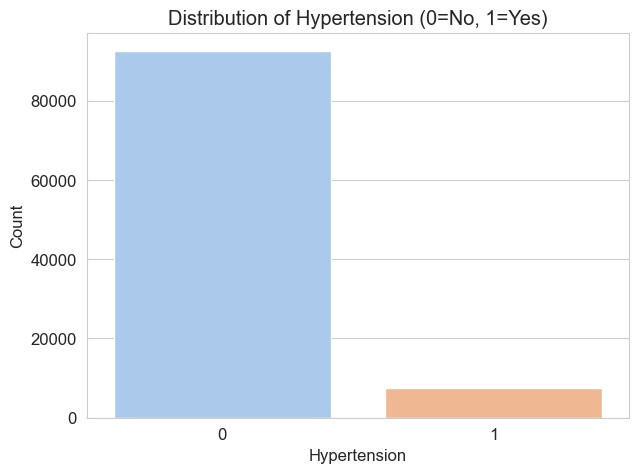

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='heart_disease', data=df, palette='pastel')


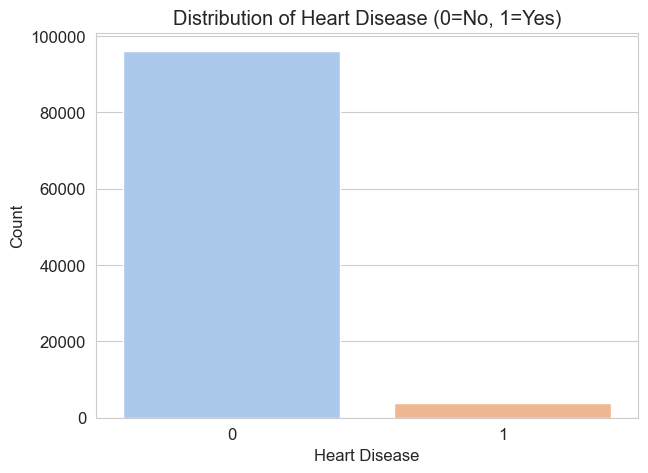

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='smoking_history', data=df, palette='coolwarm')


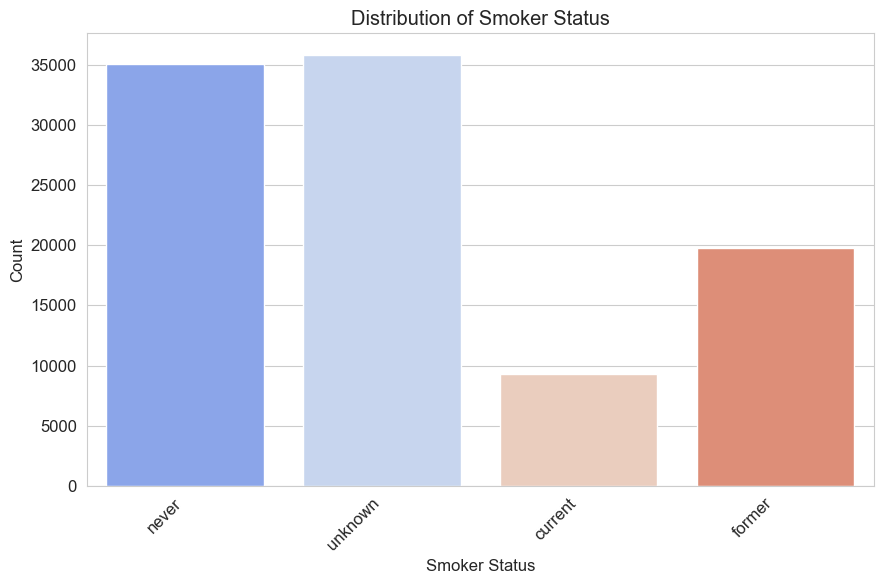

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='diabetes', data=df, palette='rocket')


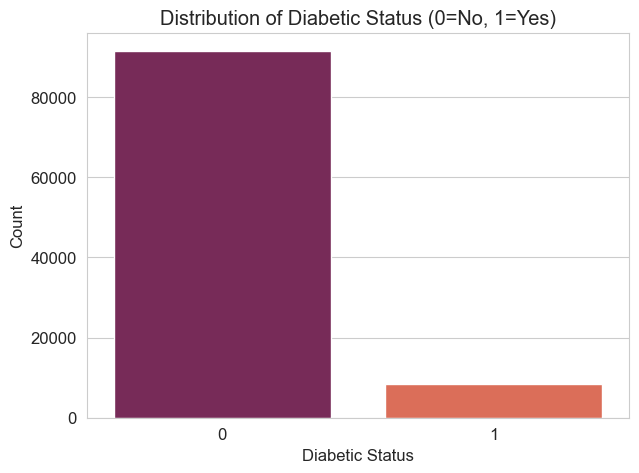

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:45: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='cubehelix', order=age_labels)


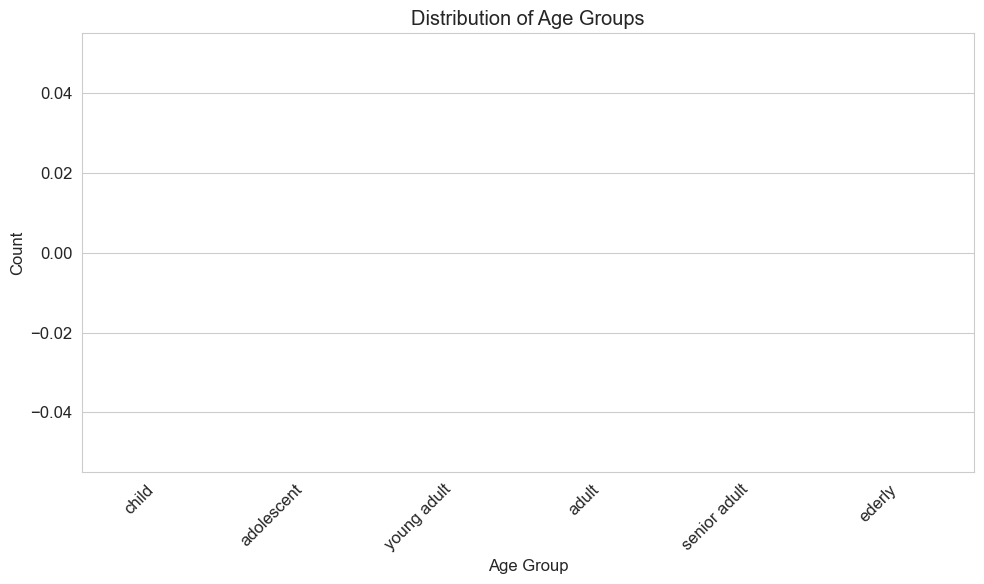

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='bmi_category', data=df, palette='mako', order=bmi_labels)


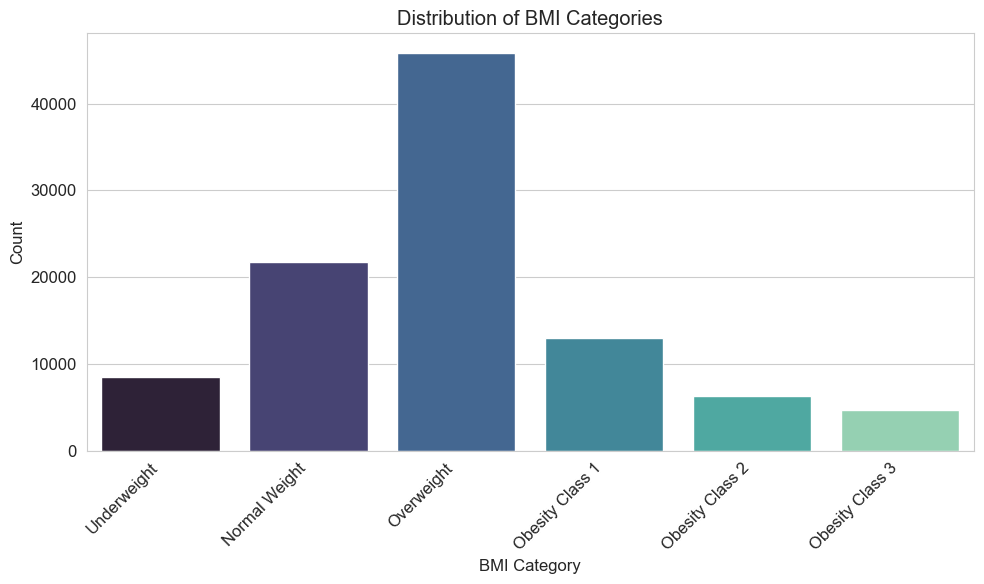

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:65: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='HbA1c_level', data=df, palette='magma', order=hba1c_labels)


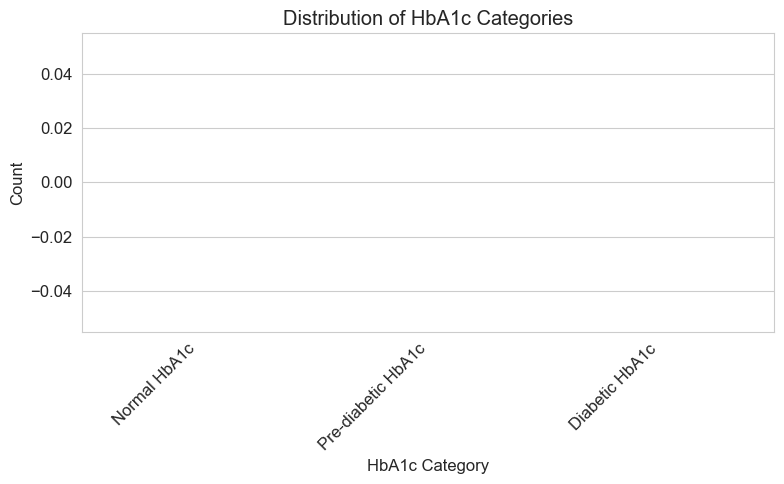

C:\Users\HP\AppData\Local\Temp\ipykernel_4160\1736987226.py:75: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='glucose_category', data=df, palette='viridis', order=glucose_labels)


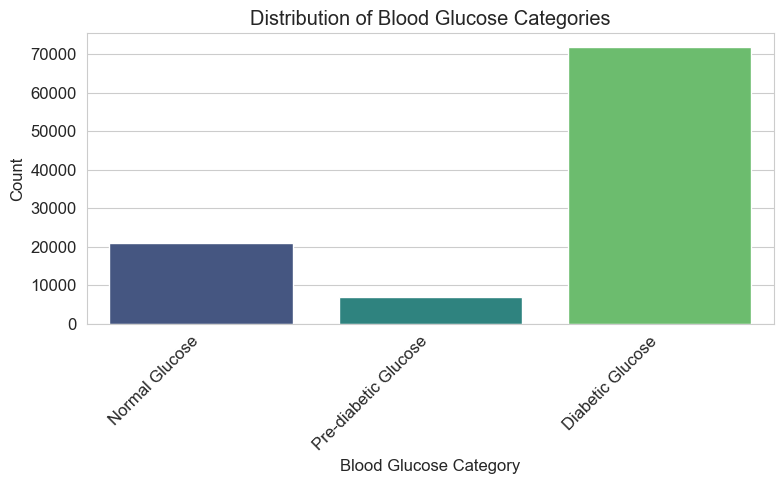

In [28]:
# Bar plot for Gender
plt.figure(figsize=(7, 5))
sns.countplot(x='gender', data=df, palette='viridis')
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Bar plot for Hypertension
plt.figure(figsize=(7, 5))
sns.countplot(x='hypertension', data=df, palette='pastel')
plt.title('Distribution of Hypertension (0=No, 1=Yes)')
plt.xlabel('Hypertension')
plt.ylabel('Count')
plt.show()

# Bar plot for Heart Disease
plt.figure(figsize=(7, 5))
sns.countplot(x='heart_disease', data=df, palette='pastel')
plt.title('Distribution of Heart Disease (0=No, 1=Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.show()

# Bar plot for Smoker Status
plt.figure(figsize=(9, 6))
sns.countplot(x='smoking_history', data=df, palette='coolwarm')
plt.title('Distribution of Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout() 
plt.show()

# Bar plot for Diabetic Status (Target Variable)
plt.figure(figsize=(7, 5))
sns.countplot(x='diabetes', data=df, palette='rocket')
plt.title('Distribution of Diabetic Status (0=No, 1=Yes)')
plt.xlabel('Diabetic Status')
plt.ylabel('Count')
plt.show()

# Bar plot for Age Group
plt.figure(figsize=(10, 6))
sns.countplot(x='age', data=df, palette='cubehelix', order=age_labels)
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for BMI Category
plt.figure(figsize=(10, 6))
sns.countplot(x='bmi_category', data=df, palette='mako', order=bmi_labels)
plt.title('Distribution of BMI Categories')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for HbA1c Category
plt.figure(figsize=(8, 5))
sns.countplot(x='HbA1c_level', data=df, palette='magma', order=hba1c_labels)
plt.title('Distribution of HbA1c Categories')
plt.xlabel('HbA1c Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Bar plot for Glucose Category
plt.figure(figsize=(8, 5))
sns.countplot(x='glucose_category', data=df, palette='viridis', order=glucose_labels)
plt.title('Distribution of Blood Glucose Categories')
plt.xlabel('Blood Glucose Category')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_11480\1468496738.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='age', data=df, palette='viridis')


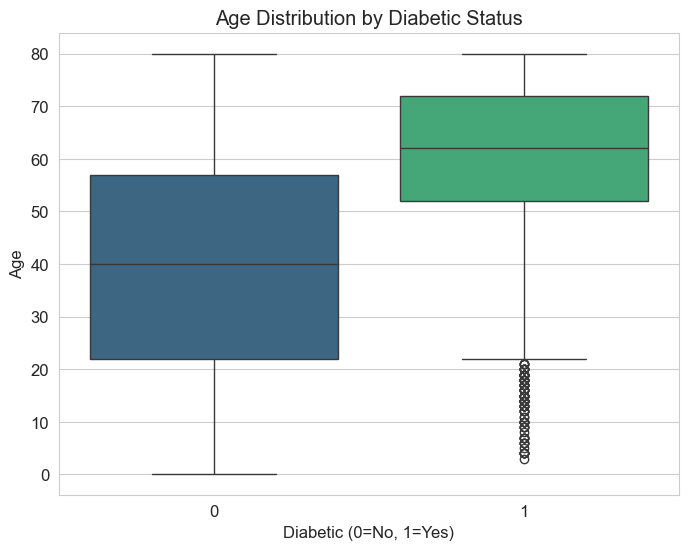

C:\Users\HP\AppData\Local\Temp\ipykernel_11480\1468496738.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='diabetes', y='bmi', data=df, palette='viridis')


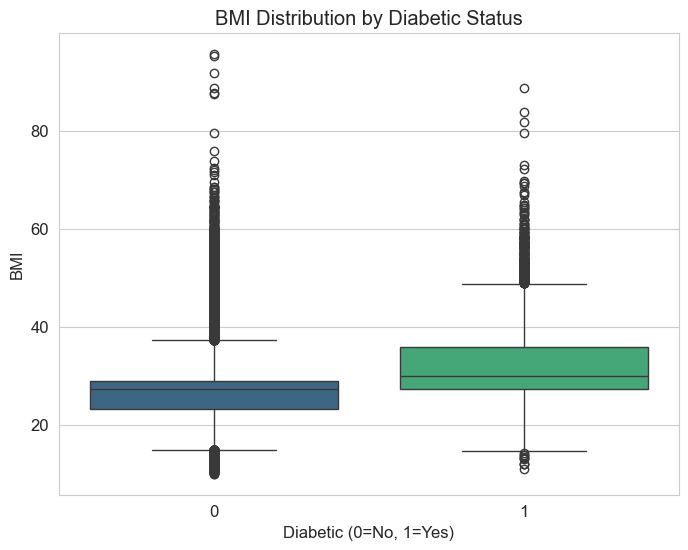

C:\Users\HP\AppData\Local\Temp\ipykernel_11480\1468496738.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y='HbA1c_level', data=df, palette='rocket')


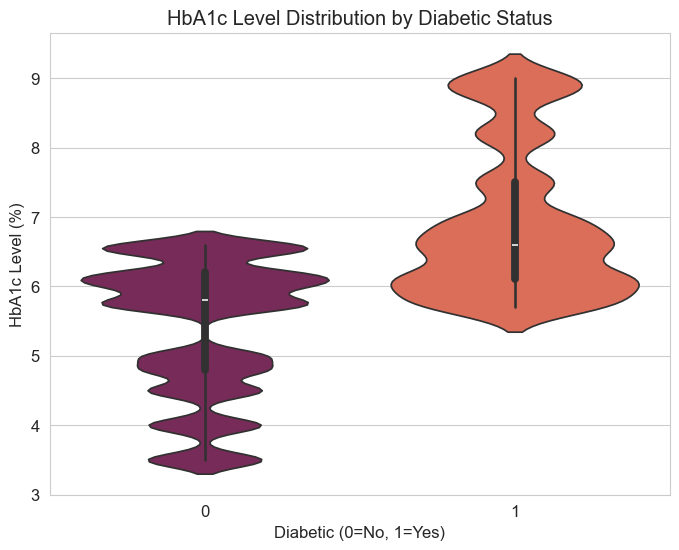

C:\Users\HP\AppData\Local\Temp\ipykernel_11480\1468496738.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='diabetes', y='blood_glucose_level', data=df, palette='rocket')


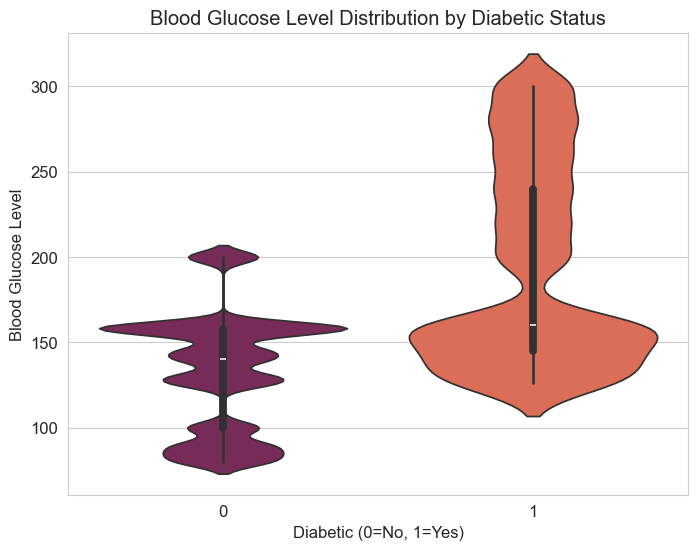

In [23]:
# Box Plot: Age vs. Diabetic Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='age', data=df, palette='viridis')
plt.title('Age Distribution by Diabetic Status')
plt.xlabel('Diabetic (0=No, 1=Yes)')
plt.ylabel('Age')
plt.show()

# Box Plot: BMI vs. Diabetic Status
plt.figure(figsize=(8, 6))
sns.boxplot(x='diabetes', y='bmi', data=df, palette='viridis')
plt.title('BMI Distribution by Diabetic Status')
plt.xlabel('Diabetic (0=No, 1=Yes)')
plt.ylabel('BMI')
plt.show()

# Violin Plot: HbA1c Level vs. Diabetic Status (shows density too)
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='HbA1c_level', data=df, palette='rocket')
plt.title('HbA1c Level Distribution by Diabetic Status')
plt.xlabel('Diabetic (0=No, 1=Yes)')
plt.ylabel('HbA1c Level (%)')
plt.show()

# Violin Plot: Blood Glucose Level vs. Diabetic Status
plt.figure(figsize=(8, 6))
sns.violinplot(x='diabetes', y='blood_glucose_level', data=df, palette='rocket')
plt.title('Blood Glucose Level Distribution by Diabetic Status')
plt.xlabel('Diabetic (0=No, 1=Yes)')
plt.ylabel('Blood Glucose Level')
plt.show()


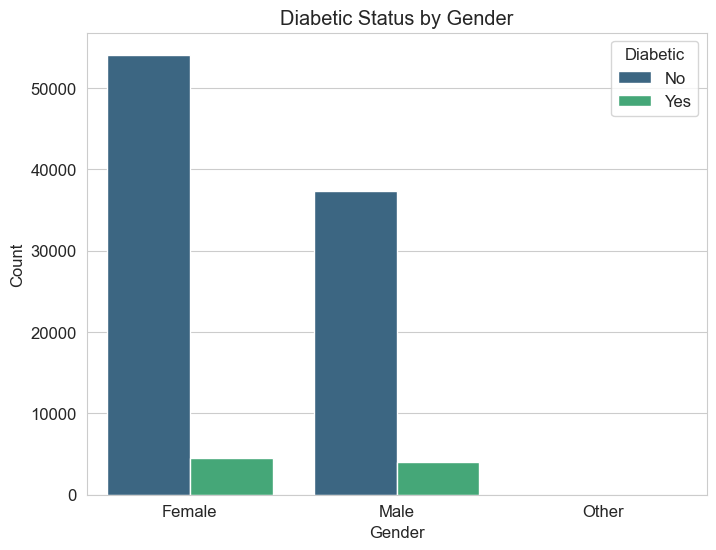

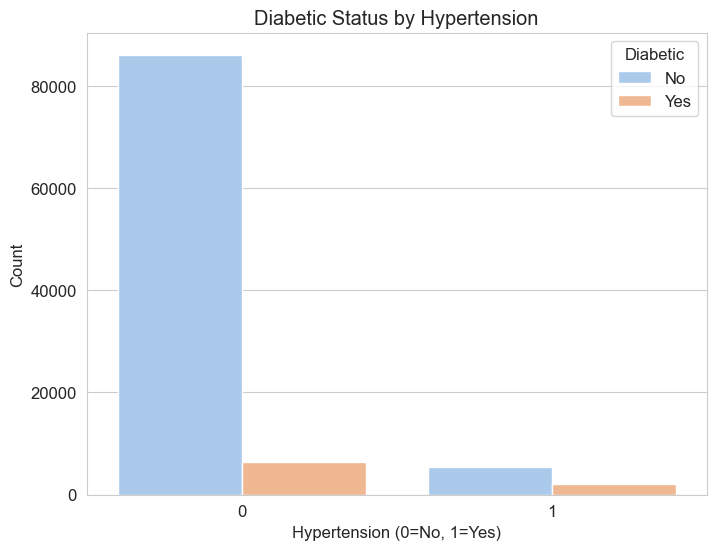

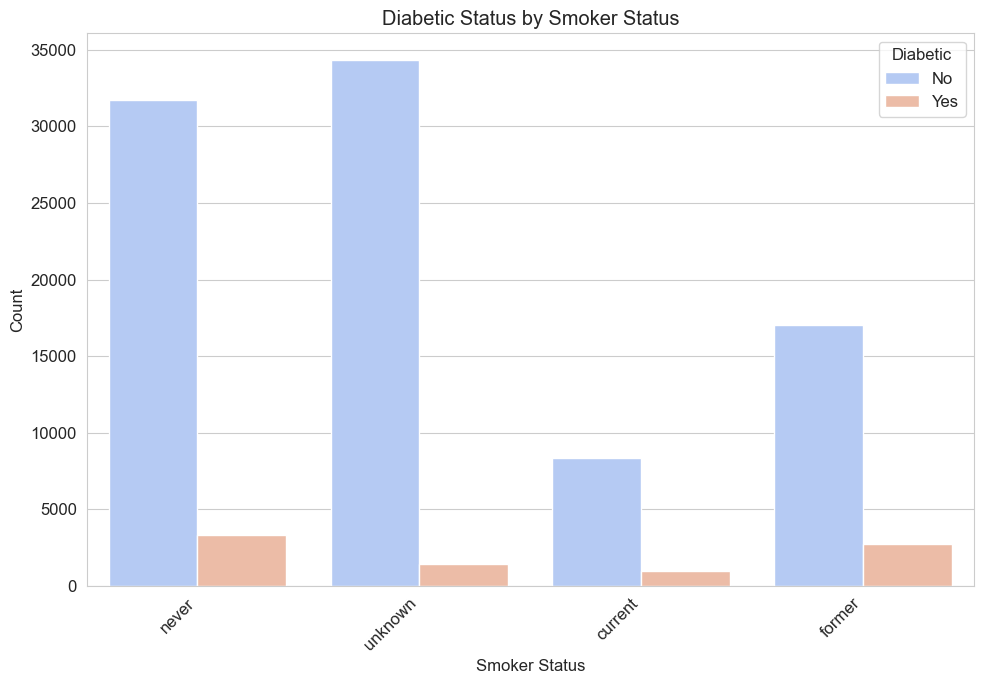

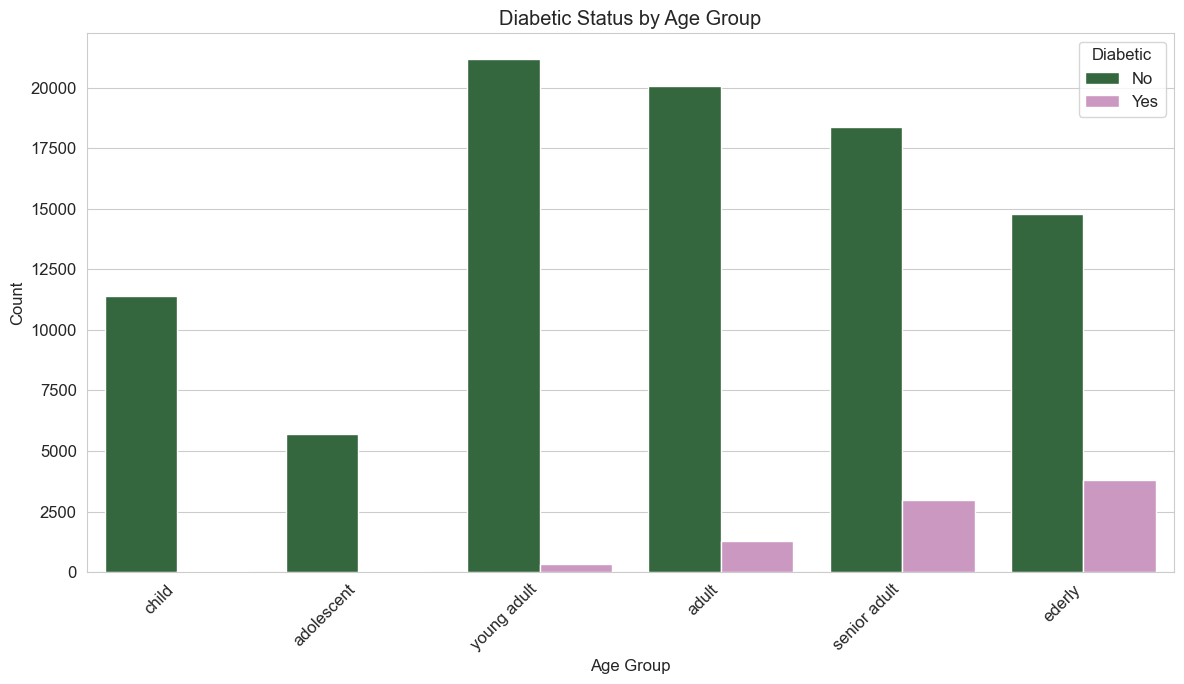

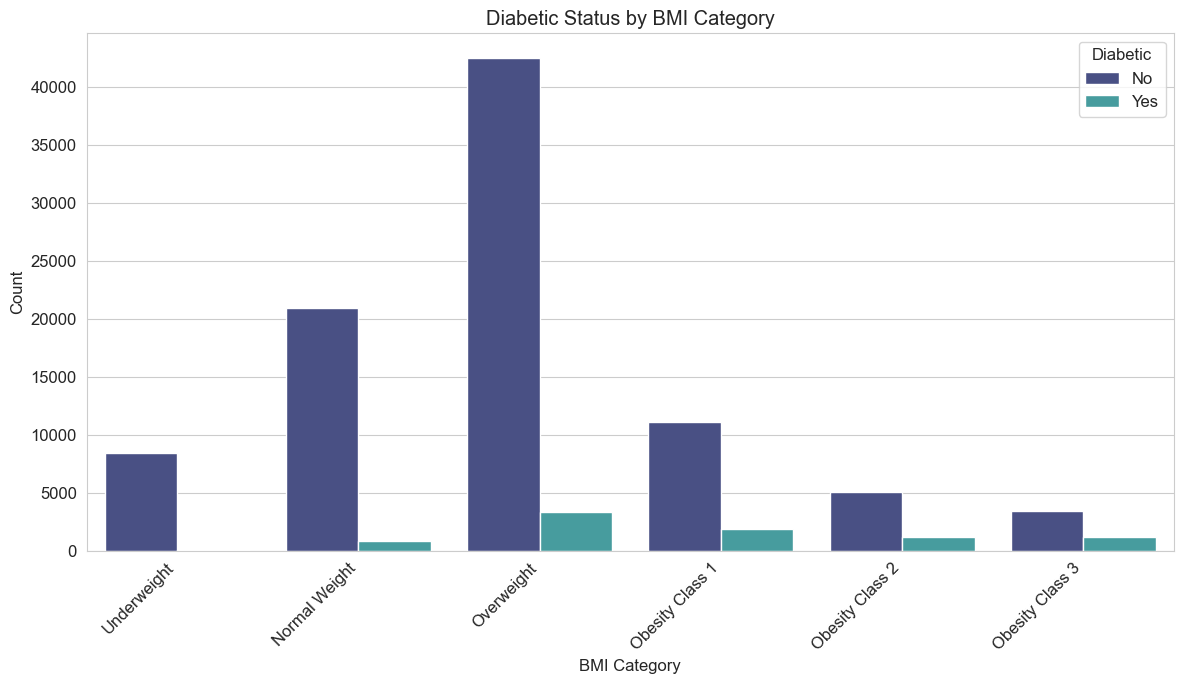

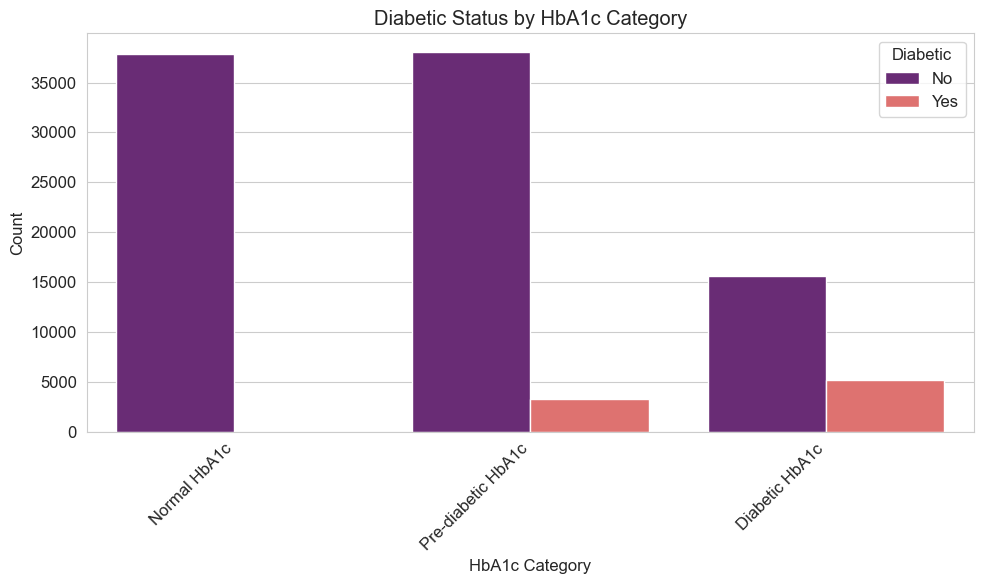

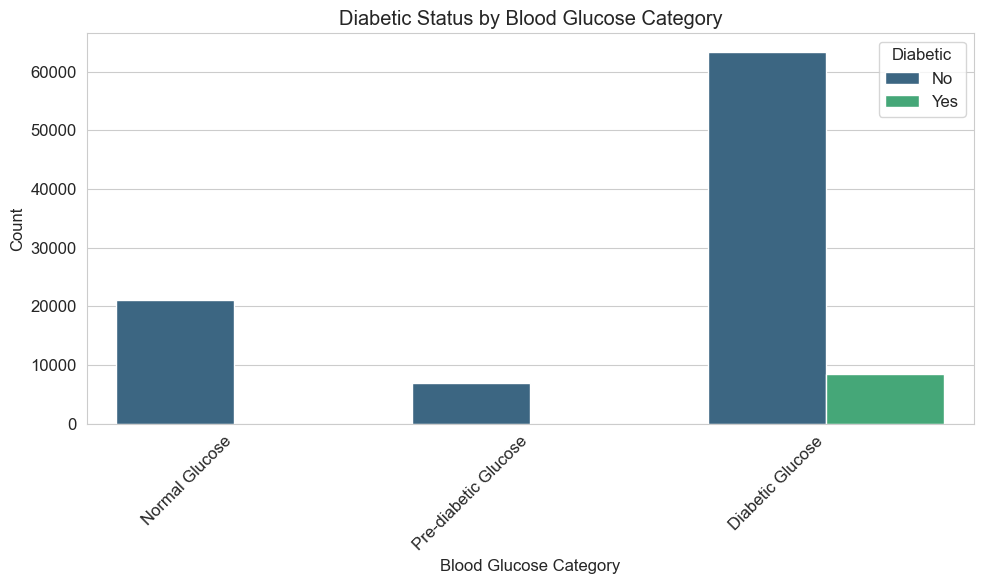

In [24]:
# Count Plot: Gender vs. Diabetic Status
plt.figure(figsize=(8, 6))
sns.countplot(x='gender', hue='diabetes', data=df, palette='viridis')
plt.title('Diabetic Status by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.show()

# Count Plot: Hypertension vs. Diabetic Status
plt.figure(figsize=(8, 6))
sns.countplot(x='hypertension', hue='diabetes', data=df, palette='pastel')
plt.title('Diabetic Status by Hypertension')
plt.xlabel('Hypertension (0=No, 1=Yes)')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.show()

# Count Plot: Smoker Status vs. Diabetic Status
plt.figure(figsize=(10, 7))
sns.countplot(x='smoking_history', hue='diabetes', data=df, palette='coolwarm')
plt.title('Diabetic Status by Smoker Status')
plt.xlabel('Smoker Status')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count Plot: Age Group vs. Diabetic Status
plt.figure(figsize=(12, 7))
sns.countplot(x='age group', hue='diabetes', data=df, palette='cubehelix', order=age_labels)
plt.title('Diabetic Status by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count Plot: BMI Category vs. Diabetic Status
plt.figure(figsize=(12, 7))
sns.countplot(x='bmi_category', hue='diabetes', data=df, palette='mako', order=bmi_labels)
plt.title('Diabetic Status by BMI Category')
plt.xlabel('BMI Category')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count Plot: HbA1c Category vs. Diabetic Status
plt.figure(figsize=(10, 6))
sns.countplot(x='hba1c_category', hue='diabetes', data=df, palette='magma', order=hba1c_labels)
plt.title('Diabetic Status by HbA1c Category')
plt.xlabel('HbA1c Category')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Count Plot: Glucose Category vs. Diabetic Status
plt.figure(figsize=(10, 6))
sns.countplot(x='glucose_category', hue='diabetes', data=df, palette='viridis', order=glucose_labels)
plt.title('Diabetic Status by Blood Glucose Category')
plt.xlabel('Blood Glucose Category')
plt.ylabel('Count')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

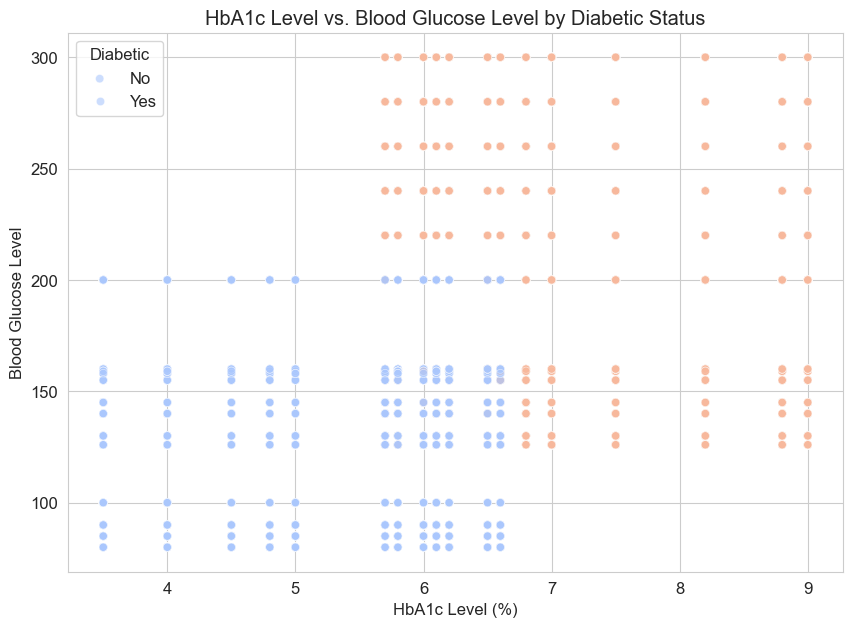

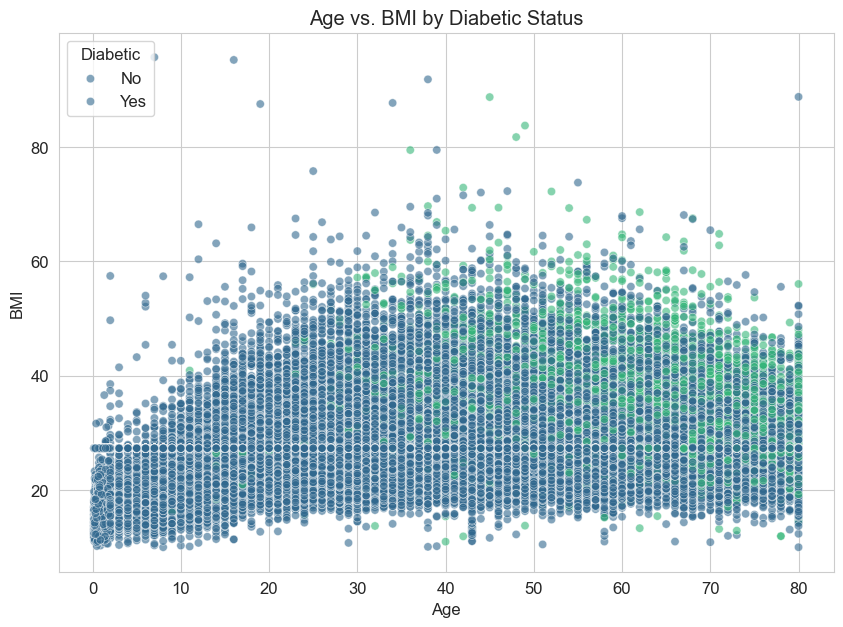

In [29]:
# Scatter Plot: HbA1c Level vs. Blood Glucose Level (colored by Diabetic Status)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='HbA1c_level', y='blood_glucose_level', hue='diabetes', data=df, palette='coolwarm', alpha=0.6)
plt.title('HbA1c Level vs. Blood Glucose Level by Diabetic Status')
plt.xlabel('HbA1c Level (%)')
plt.ylabel('Blood Glucose Level')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.show()

# Scatter Plot: Age vs. BMI (colored by Diabetic Status)
plt.figure(figsize=(10, 7))
sns.scatterplot(x='age', y='bmi', hue='diabetes', data=df, palette='viridis', alpha=0.6)
plt.title('Age vs. BMI by Diabetic Status')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.legend(title='Diabetic', labels=['No', 'Yes'])
plt.show()

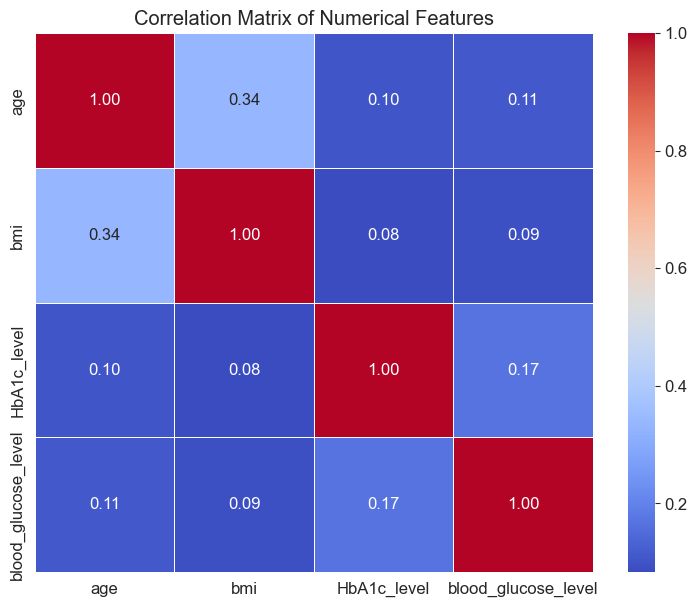

In [30]:
numerical_cols = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
correlation_matrix = df[numerical_cols].corr()

plt.figure(figsize=(9, 7))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [27]:
# Average numerical features by Diabetic Status
print("\n--- Average Numerical Features by Diabetic Status: ---")
print(df.groupby('diabetes')[['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']].mean())

# Average HbA1c and Glucose by Age Group and Diabetic Status
print("\n--- Average HbA1c and Glucose by Age Group and Diabetic Status: ---")
print(df.groupby(['age group', 'diabetes'])[['HbA1c_level', 'blood_glucose_level']].mean())

# Count of Diabetic cases by Smoker Status
print("\n--- Count of Diabetic Cases by Smoker Status: ---")
print(df.groupby('smoking_history')['diabetes'].value_counts(normalize=True).unstack())


--- Average Numerical Features by Diabetic Status: ---
                age        bmi  HbA1c_level  blood_glucose_level
diabetes                                                        
0         40.132073  26.887163     5.396761           132.852470
1         60.946588  31.988382     6.934953           194.094706

--- Average HbA1c and Glucose by Age Group and Diabetic Status: ---
                       HbA1c_level  blood_glucose_level
age group    diabetes                                  
child        0            5.411511           132.737410
             1            7.161290           204.387097
adolescent   0            5.404138           132.833246
             1            6.815686           196.196078
young adult  0            5.389535           132.872262
             1            6.921849           186.114846
adult        0            5.392548           132.646904
             1            6.903622           193.324409
senior adult 0            5.403203           133.259356

C:\Users\HP\AppData\Local\Temp\ipykernel_11480\2068076872.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby(['age group', 'diabetes'])[['HbA1c_level', 'blood_glucose_level']].mean())


In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (10, 6) # Default figure size
plt.rcParams['font.size'] = 12 # Default font size

print(f"Current DataFrame shape: {df.shape}")
print("\n--- Current Data Types: ---")
print(df.dtypes)
print("\n--- First 5 rows with all processed columns: ---")
print(df.head())

Current DataFrame shape: (100000, 13)

--- Current Data Types: ---
gender                   object
age                     float64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
age group              category
bmi_category           category
hba1c_category         category
glucose_category       category
dtype: object

--- First 5 rows with all processed columns: ---
   gender   age  hypertension  heart_disease smoking_history    bmi  \
0  Female  80.0             0              1           never  25.19   
1  Female  54.0             0              0         unknown  27.32   
2    Male  28.0             0              0           never  27.32   
3  Female  36.0             0              0         current  23.45   
4    Male  76.0             1              1         current  20.14   

   HbA1c_level  blood_gluc

In [34]:
numerical_features = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']
categorical_features = ['gender', 'hypertension', 'heart_disease', 'smoking_history'] 

In [35]:
all_features = numerical_features + categorical_features
X = df[all_features]
y = df['diabetes']

In [36]:
# preprocessor to apply different transformations to different columns=
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features), # Scale numerical features
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # One-hot encode categorical features
    ])

model_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                 ('classifier', LogisticRegression(solver='liblinear', random_state=42))]) # solver='liblinear' is good for small datasets

print("\nPreprocessing pipeline created.")


Preprocessing pipeline created.


In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"\nX_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")
print(f"Proportion of diabetic in y_train: {y_train.mean():.2f}")
print(f"Proportion of diabetic in y_test: {y_test.mean():.2f}")


X_train shape: (80000, 8), y_train shape: (80000,)
X_test shape: (20000, 8), y_test shape: (20000,)
Proportion of diabetic in y_train: 0.09
Proportion of diabetic in y_test: 0.09


In [38]:
print("\n Training the Logistic Regression Model ")
model_pipeline.fit(X_train, y_train)
print("Model training complete.")


 Training the Logistic Regression Model 
Model training complete.



--- Model Evaluation on Test Set ---
Accuracy: 0.9604
Precision: 0.8586
Recall: 0.6394
F1-Score: 0.7330

--- Classification Report: ---
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     18300
           1       0.86      0.64      0.73      1700

    accuracy                           0.96     20000
   macro avg       0.91      0.81      0.86     20000
weighted avg       0.96      0.96      0.96     20000


--- Confusion Matrix: ---
[[18121   179]
 [  613  1087]]


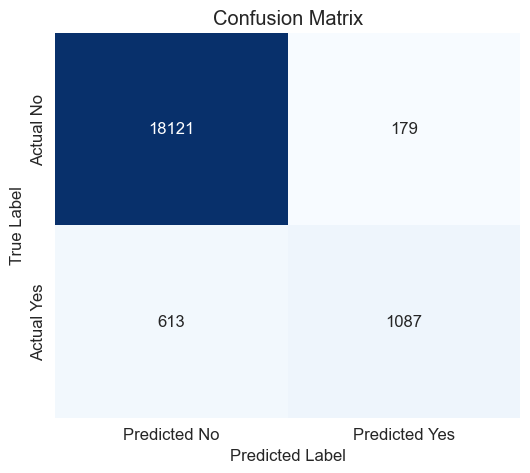

In [36]:
y_pred = model_pipeline.predict(X_test)
y_proba = model_pipeline.predict_proba(X_test)[:, 1] # Probabilities for the positive class (diabetic=1)

print("\n--- Model Evaluation on Test Set ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred):.4f}")
print(f"Recall: {recall_score(y_test, y_pred):.4f}")
print(f"F1-Score: {f1_score(y_test, y_pred):.4f}")

print("\n--- Classification Report: ---")
print(classification_report(y_test, y_pred))

print("\n--- Confusion Matrix: ---")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# Visualize Confusion Matrix
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [37]:
# Check for any remaining NaNs
print("\n--- Final NaN check before export: ---")
print(df.isnull().sum())

# Review data types one last time
print("\n--- Final Data Types before export: ---")
print(df.dtypes)



--- Final NaN check before export: ---
gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
age group              0
bmi_category           0
hba1c_category         0
glucose_category       0
dtype: int64

--- Final Data Types before export: ---
gender                   object
age                     float64
hypertension              int64
heart_disease             int64
smoking_history          object
bmi                     float64
HbA1c_level             float64
blood_glucose_level       int64
diabetes                  int64
age group              category
bmi_category           category
hba1c_category         category
glucose_category       category
dtype: object


In [39]:
output_csv_file = 'diabetes_cleaned_for_powerbi.csv'
df.to_csv(output_csv_file, index=False)
print(f"\nCleaned data exported to '{output_csv_file}' successfully.")


Cleaned data exported to 'diabetes_cleaned_for_powerbi.csv' successfully.


In [41]:
df.to_csv(r"C:\Users\HP\Documents\data projects\diabetes_data.csv", index=False)
print('data saved succesfully')

data saved succesfully
